In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34
reuters = keras.datasets.reuters
(train_text, train_topic), (test_text, test_topic) = reuters.load_data()

In [2]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.
train_text.shape, train_topic.shape

((8982,), (8982,))

In [3]:
test_text.shape,test_topic.shape

((2246,), (2246,))

In [4]:
train_text.dtype, train_topic.dtype

(dtype('O'), dtype('int64'))

In [5]:
test_text.dtype, test_topic.dtype

(dtype('O'), dtype('int64'))

Text(0.5, 1.0, 'text of length')

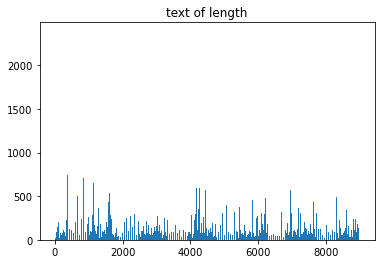

In [6]:
# train_text에서 각 원소의 길이를 y축으로 bar plot를 그려보세요.
plt.bar(range(len(train_text)), [len(text) for text in train_text])
plt.title('text of length')
        

In [7]:
all_words = set([word for text in train_text for word in text]) | set([word for text in test_text for word in text])

In [8]:
print(sorted(all_words)[:5])
print(sorted(all_words)[-5:])

[1, 2, 4, 5, 6]
[30977, 30978, 30979, 30980, 30981]


In [9]:
import numpy as np
from keras import backend as K
x = np.array([[2,4,6],[3,6,9,12],[5,10]])
display(x)

array([list([2, 4, 6]), list([3, 6, 9, 12]), list([5, 10])], dtype=object)

In [10]:
# bar
from keras.preprocessing import sequence
x_prime = sequence.pad_sequences(x)
display(x_prime)

array([[ 0,  2,  4,  6],
       [ 3,  6,  9, 12],
       [ 0,  0,  5, 10]], dtype=int32)

In [11]:
train_bow_text = tf.keras.preprocessing.sequence.pad_sequences(train_text,value=0)
test_bow_text = tf.keras.preprocessing.sequence.pad_sequences(test_text,value=0)

In [12]:
train_bow_text.shape, test_bow_text.shape

((8982, 2376), (2246, 1032))

In [13]:
# train과 test에 나온 word들의 count를 측정해보자
import collections
word_count = collections.Counter()
for text in train_text:
    word_count.update(text)
for text in test_text:
    word_count.update(text)
word_count.most_common(10)

[(4, 82723),
 (5, 42393),
 (6, 40350),
 (7, 33157),
 (8, 29978),
 (9, 29956),
 (10, 29581),
 (11, 20141),
 (12, 16668),
 (13, 15224)]

In [14]:
# word_count를 이용해서 n번 미만으로 나온 word를 삭제하여 train과 test를 구성하여보자.
def cut_by_count(texts,n):
    return np.array([ [word for word in text if word_count[word] >= n ] for text in texts])
        
            
    

In [15]:
train_cut_text = cut_by_count(train_text,20)
test_cut_text = cut_by_count(test_text, 20)

In [16]:
train_cut_text.shape, test_cut_text.shape

((8982,), (2246,))

In [17]:
# train_text/test_text에 길이 제한을 줘서 bow를 생성해보세요

train_cut_bow_text2 = tf.keras.preprocessing.sequence.pad_sequences(train_text, value=0,maxlen=200)
test_cut_bow_text2 = tf.keras.preprocessing.sequence.pad_sequences(test_text,value=0,maxlen=200)

In [18]:
train_cut_bow_text2.shape, test_cut_bow_text2.shape

((8982, 200), (2246, 200))

In [19]:
# topic을 onehot encoding으로 변경해보세요.
np.unique(train_topic)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [20]:
train_onehot_topic = keras.utils.to_categorical(train_topic)
test_onehot_topic = keras.utils.to_categorical(test_topic)

In [21]:
train_onehot_topic.shape, test_onehot_topic.shape

((8982, 46), (2246, 46))

In [22]:
#topic 인덱스를 text label로 변환하는 함수를 만드세요.
raw_labels = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [23]:
def topic2label(idx):
    return raw_labels[idx]

In [24]:
topic2label(0), topic2label(45)

('cocoa', 'lead')

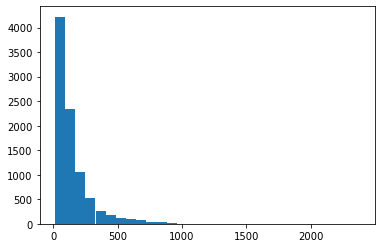

In [25]:
# train_bow_text의 길이 분포를 출력해보세요.
plt.hist([len(s) for s in train_text], bins=30)
plt.show()

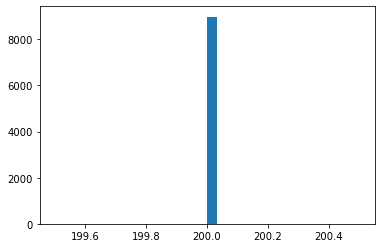

In [26]:
#  train_cut_bow_text2의 길이 분포를 출력해보세요.
plt.hist([len(s) for s in train_cut_bow_text2], bins=30)
plt.show()

In [27]:
train_cut_bow_text2.shape

(8982, 200)

<BarContainer object of 46 artists>

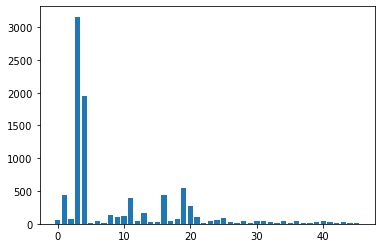

In [28]:
# label 분포를 출력
# plt.bar(np.unique(train_topic), list(map(lambda x:x[1], sorted(collections.Counter(train_topic.items())))))
plt.bar(np.unique(train_topic), list(map(lambda x:x[1], sorted(collections.Counter(train_topic).items()))))
# plt.show()

In [29]:
# plt.bar(np.unique(train_topic,return_counts=True)) 에

<AxesSubplot:ylabel='count'>

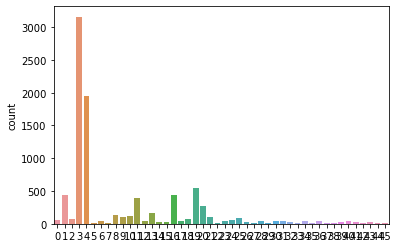

In [30]:
sns.countplot(train_topic)

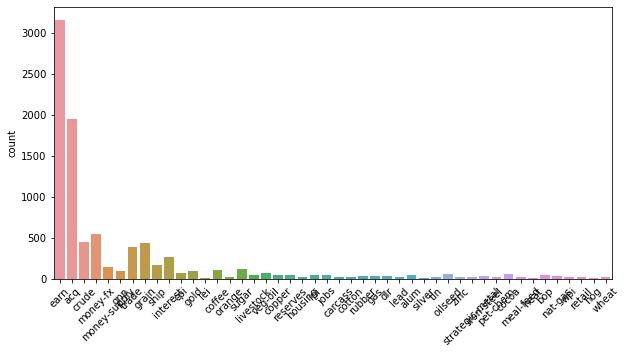

In [31]:
sns.countplot(list(map(lambda x : topic2label(x),train_topic)))
plt.xticks(rotation=45) # 일자가 아닌 대각선으로 라벨을 기재해줌.
fig =plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [69]:
# reuters.get_word_index()를 이용해서 text를 decode해보세요.
# index를 word로 하기

index_word = {y:x for x, y in (reuters.get_word_index().items())}

def bow2text(bow):
    return " ".join([index_word[idx] for idx in bow])
bow2text(test_text[1])

"the slide both their a in after london adjusted 2 contracts 54 as sales agriculture with from were vs been prices its for benefit from dlrs vs been are 2 both 97 firms deficient i geneen briefly mln briefly week operating for giving 28 in record disappointed spending shr initiative around five farmers in but 18 66 5 efforts scale will t net mln with deal from billion vs been said in after london adjusted 5 will agip it take supplies briefly mln 9 confidence on been 5 will agriculture method it in has would both administration without on been it intended figures 3 total on been 5 will 75 that in into shares net mln january in three subject for system guaranty deficient users and 381 surviving in attempt 5 higher prices producers without on been 57 request in executive in three it at china concentrate as sales priorities paris said in attempt last told showed 1 and 48 deficit be what briefly mln surviving over qtr prices today is said acres agree in one news possible be 9 1988 vs region

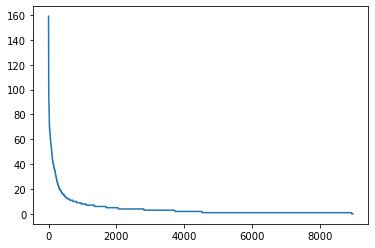

In [70]:
# 문서당 가장 많은 횟수로 출현한 word 분포를 출력하세요.
plt.plot(sorted([np.unique(doc,return_counts=True)[1].argmax() for doc in train_text], reverse=True))
# plt.plot(sorted([np.unique(doc,return_counts=True)[1].argmax() for doc in train_text], reverse=True))

plt.show()

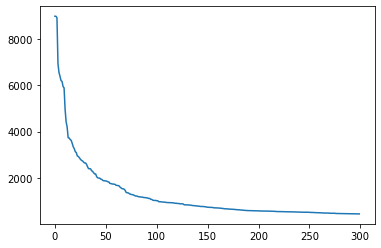

In [71]:
table = np.zeros(len(all_words)*2)
for doc in train_text:
    table[np.unique(doc)] += 1
plt.plot(sorted(table, reverse=True)[:300])
plt.show()

In [72]:
# modeling
from keras.layers import Input, Embedding, GRU, Dense
from keras.models import Model

In [73]:
def Seq2Seq():
    inputs_x_bow = Input(shape=(200,))
    embedding = Embedding(len(index_word)+1, 120)
    
    x = embedding(inputs_x_bow)
    z = GRU(64)(x)
    y = Dense(46, activation='softmax')(z)
    
    model = Model(inputs_x_bow, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [74]:
model = Seq2Seq()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 120)          3717600   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                35712     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2990      
Total params: 3,756,302
Trainable params: 3,756,302
Non-trainable params: 0
_________________________________________________________________


In [83]:
hist = model.fit(
        train_cut_bow_text2,
        train_onehot_topic,
        validation_data=(test_cut_bow_text2, test_onehot_topic),
        verbose=1,
        epochs=20)

Epoch 1/20
281/281 [==============================] - 16s 57ms/step - loss: 1.4448 - accuracy: 0.6295 - val_loss: 1.5891 - val_accuracy: 0.6104
Epoch 2/20
281/281 [==============================] - 16s 57ms/step - loss: 1.2354 - accuracy: 0.6831 - val_loss: 1.5295 - val_accuracy: 0.6278
Epoch 3/20
281/281 [==============================] - 15s 53ms/step - loss: 1.0312 - accuracy: 0.7298 - val_loss: 1.4873 - val_accuracy: 0.6478
Epoch 4/20
281/281 [==============================] - 14s 51ms/step - loss: 0.8732 - accuracy: 0.7744 - val_loss: 1.5044 - val_accuracy: 0.6438
Epoch 5/20
281/281 [==============================] - 14s 50ms/step - loss: 0.7489 - accuracy: 0.8078 - val_loss: 1.5278 - val_accuracy: 0.6585
Epoch 6/20
281/281 [==============================] - 14s 50ms/step - loss: 0.6468 - accuracy: 0.8391 - val_loss: 1.5732 - val_accuracy: 0.6607
Epoch 7/20
281/281 [==============================] - 14s 50ms/step - loss: 0.5660 - accuracy: 0.8607 - val_loss: 1.6676 - val_accuracy:

In [ ]:
train_cut_bow_text2.shape,train_onehot_topic.shape

In [ ]:
test_bow_text.shape

In [ ]:
# hist의 accuracy와 loss를 plt의 plot을 이용하여 출력하는 코드를 작성하세요.
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# 완성된 모델에서 test 하나를 예측하고 결과를 res 변수에 저정하세요.
res = model.predict(test_cut_bow_text2[])

In [42]:
topic2label(test_onehot_topic[1].argmax())

'sugar'

'sugar'

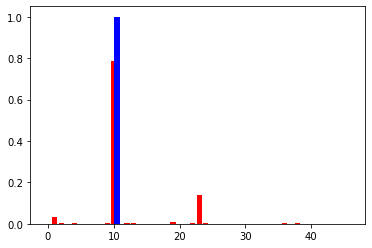

In [55]:
wrong1 = model.predict(test_cut_bow_text2[1:2, -200:])
plt.bar(np.array(range(len(wrong1[0]))), wrong1[0], color='red')
plt.bar(np.array(range(len(wrong1[0])))+0.5, test_onehot_topic[1], color='blue')
topic2label(test_onehot_topic[1].argmax()) 

In [76]:
text = bow2text(test_text[0])
text

'the in wants intermediate 3 how types could mln at against 2 guidelines vs end products opec he will will along results and willingly exports 3 purchased each it stubbornly profit 3 avondale profit agreement in around corp should for 3 cannot mln in ended said avondale a 54 but 3 stubbornly a only generally political primarily date other under well a in british rate gain if demand at an div its taking report montreal systems were is and production had vs 000 7 issued year for 0 a in buffer rate loss may results tariffs dlrs is and from 39 s 000 for 3 cannot pre 50 east that in foods products opec last 1 fall change 1 approval in 15 2 said in opec 28 but for 3 cannot cts systems which is half be 6 iffezheim uobm said president amount pct dlrs'

In [77]:
def text2bow(text, maxlen = 400):
    word_index = reuters.get_word_index()
    seq = np.array([word_index[word] for word in text.lower().replace("\n", " ").split() if word in word])
    bow = tf.keras.preprocessing.sequence.pad_sequences([seq], value = 0, maxlen = maxlen)
    return bow

In [78]:
bow = text2bow(text)
bow.shape

(1, 400)

<BarContainer object of 46 artists>

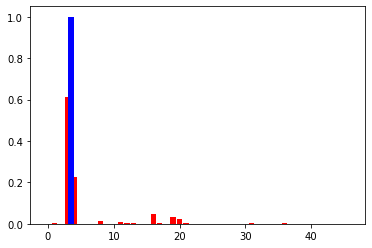

In [79]:
res1 = model.predict(bow[..., -200:])
plt.bar(np.array(range(len(res1[0]))),res1[0], color='red')
plt.bar(np.array(range(len(res1[0])))+0.5, test_onehot_topic[0], color='blue')

In [80]:
bow

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [81]:
from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(test_onehot_topic.argmax(axis=1), model.predict(test_cut_bow_text2).argmax(axis=1))

<AxesSubplot:>

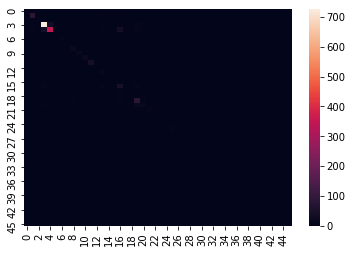

In [50]:
sns.heatmap(conf_mat1)

<AxesSubplot:>

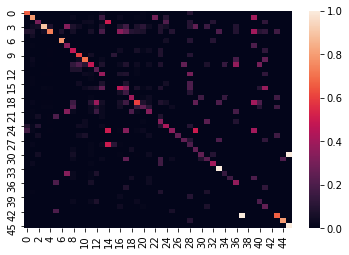

In [51]:
sns.heatmap(conf_mat1 / conf_mat1.sum(axis=1))


In [52]:
from sklearn.metrics import classification_report
# classification 결과 리포팅
from sklearn.metrics import classification_report
print( classification_report(test_onehot_topic.argmax(axis=1), model.predict(test_cut_bow_text2).argmax(axis=1), target_names=raw_labels) )

                 precision    recall  f1-score   support

          cocoa       0.67      0.67      0.67        12
          grain       0.67      0.79      0.73       105
        veg-oil       0.50      0.30      0.37        20
           earn       0.91      0.89      0.90       813
            acq       0.84      0.73      0.78       474
          wheat       0.00      0.00      0.00         5
         copper       0.92      0.79      0.85        14
        housing       0.25      0.33      0.29         3
   money-supply       0.33      0.47      0.39        38
         coffee       0.56      0.60      0.58        25
          sugar       0.68      0.70      0.69        30
          trade       0.45      0.48      0.47        83
       reserves       0.21      0.23      0.22        13
           ship       0.25      0.38      0.30        37
         cotton       0.00      0.00      0.00         2
        carcass       0.00      0.00      0.00         9
          crude       0.34    

In [53]:
model.save('./nespaer.h5')

In [82]:
loss, acc = model.evaluate(test_cut_bow_text2.test_onehot_topic, verbose=1)
print(loss, acc)

AttributeError: 'numpy.ndarray' object has no attribute 'test_onehot_topic'